### Initial Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ad_data=pd.read_csv('advertising.csv')

In [3]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
#Load Data
data = ad_data
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(data)
 
df.shape

ValueError: could not convert string to float: 'Cloned 5thgeneration orchestration'

In [17]:
ad_data.drop('Ad Topic Line', inplace=True, axis=1)

In [18]:
ad_data.drop('Timestamp', inplace=True, axis=1)

In [19]:
X = ad_data.iloc[:, :-1].values
Y = ad_data.iloc[:, -1].values

In [20]:
one_hot_encoded_data = pd.get_dummies(ad_data, columns = ['City', 'Country'])
print(one_hot_encoded_data)

     Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Male  \
0                       68.95   35     61833.90                256.09     0   
1                       80.23   31     68441.85                193.77     1   
2                       69.47   26     59785.94                236.50     0   
3                       74.15   29     54806.18                245.89     1   
4                       68.37   35     73889.99                225.58     0   
..                        ...  ...          ...                   ...   ...   
995                     72.97   30     71384.57                208.58     1   
996                     51.30   45     67782.17                134.42     1   
997                     51.63   51     42415.72                120.37     1   
998                     55.55   19     41920.79                187.95     0   
999                     45.01   26     29875.80                178.35     0   

     Clicked on Ad  City_Adamsbury  City_Adamside  

In [21]:
Y = one_hot_encoded_data.iloc[:, 5].values

In [22]:
one_hot_encoded_data.drop('Clicked on Ad', inplace=True, axis=1)

In [23]:
X = one_hot_encoded_data.iloc[:, :].values

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, :] = sc.fit_transform(X_train[:, :])
X_test[:, :] = sc.transform(X_test[:, :])

### K means using elbow method

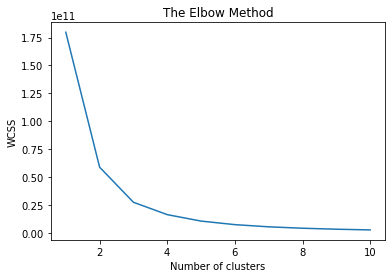

In [26]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [27]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[4 0 4 2 0 4 2 3 0 2 2 4 2 2 3 2 3 0 3 3 4 4 3 4 0 4 1 4 3 2 2 2 3 3 2 4 4
 0 4 3 4 4 0 4 4 2 2 0 2 2 4 4 2 4 4 0 0 2 4 3 2 4 0 4 0 0 2 2 4 3 4 0 0 1
 4 4 4 2 3 2 4 0 4 3 0 2 0 4 1 1 0 4 4 4 3 2 3 4 2 0 3 2 4 2 4 0 2 0 3 0 4
 4 4 1 0 4 0 4 3 2 4 4 4 1 0 4 4 4 0 0 3 2 0 0 2 3 1 1 4 0 4 2 0 4 0 2 4 2
 0 4 0 0 1 0 4 4 4 4 4 0 0 4 4 4 2 2 3 2 1 4 2 0 0 4 0 0 1 4 1 4 3 1 1 4 2
 1 1 4 1 3 1 1 1 2 2 2 4 4 0 0 0 2 3 0 0 1 0 4 1 1 4 0 2 0 0 1 1 1 4 3 2 0
 0 0 4 2 1 2 0 4 0 3 0 2 4 1 4 0 4 0 3 4 4 4 4 1 4 2 1 3 0 4 4 0 4 4 4 4 4
 1 0 2 0 2 2 4 4 0 2 4 4 0 2 0 4 3 4 2 2 4 3 3 2 0 2 2 2 0 0 0 0 4 0 4 0 0
 0 0 0 4 2 0 4 4 1 4 4 4 4 3 0 0 1 4 4 2 2 2 0 1 0 2 2 0 2 3 1 0 0 4 4 0 0
 4 0 4 4 4 0 4 4 2 2 4 2 1 1 4 0 2 4 4 4 0 1 4 3 2 1 0 4 4 0 0 0 4 0 1 0 2
 1 1 4 4 4 4 2 3 4 4 4 2 0 2 3 0 0 3 0 3 0 0 4 0 3 2 3 0 0 0 4 4 3 2 2 2 0
 1 2 2 3 0 1 1 4 1 4 0 4 0 2 4 4 3 4 0 0 4 4 2 1 2 3 4 0 0 1 4 1 2 0 4 2 2
 1 2 4 0 2 2 4 1 4 2 3 0 2 2 0 2 3 2 0 1 4 0 3 1 3 4 0 0 2 2 3 0 2 2 4 1 4
 0 0 1 2 4 0 0 1 2 1 3 0 

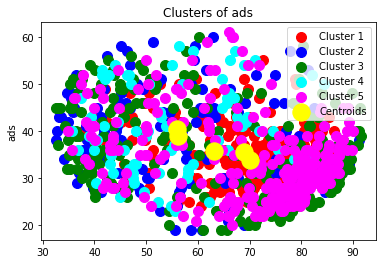

In [28]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of ads')
plt.ylabel('ads')
plt.legend()
plt.show()

In [29]:
print("The centroids are ", kmeans.cluster_centers_)

print("Assignments are: ")
print(kmeans.labels_)

The centroids are  [[ 6.89726984e+01  3.55317460e+01  7.01222288e+04 ...  3.96825397e-03
   3.96825397e-03  3.96825397e-03]
 [ 5.60542424e+01  3.90227273e+01  4.00278858e+04 ... -1.30104261e-18
   1.51515152e-02 -2.60208521e-18]
 [ 6.30547934e+01  3.57561983e+01  5.08141236e+04 ... -1.73472348e-18
  -2.60208521e-18  1.23966942e-02]
 [ 5.58969767e+01  4.03953488e+01  2.67473302e+04 ...  1.16279070e-02
  -1.73472348e-18  1.16279070e-02]
 [ 6.99775000e+01  3.39479167e+01  6.05841291e+04 ...  3.47222222e-03
   3.47222222e-03  3.47222222e-03]]
Assignments are: 
[4 0 4 2 0 4 2 3 0 2 2 4 2 2 3 2 3 0 3 3 4 4 3 4 0 4 1 4 3 2 2 2 3 3 2 4 4
 0 4 3 4 4 0 4 4 2 2 0 2 2 4 4 2 4 4 0 0 2 4 3 2 4 0 4 0 0 2 2 4 3 4 0 0 1
 4 4 4 2 3 2 4 0 4 3 0 2 0 4 1 1 0 4 4 4 3 2 3 4 2 0 3 2 4 2 4 0 2 0 3 0 4
 4 4 1 0 4 0 4 3 2 4 4 4 1 0 4 4 4 0 0 3 2 0 0 2 3 1 1 4 0 4 2 0 4 0 2 4 2
 0 4 0 0 1 0 4 4 4 4 4 0 0 4 4 4 2 2 3 2 1 4 2 0 0 4 0 0 1 4 1 4 3 1 1 4 2
 1 1 4 1 3 1 1 1 2 2 2 4 4 0 0 0 2 3 0 0 1 0 4 1 1 4 0 2 0 0 1

### Dimensional analysis

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

LinAlgError: SVD did not converge

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

As the data is supervised, PCA is not possible . As the data which I considered has only 2 classes for prediction, LDA is not supportable due to the below statement
n_components cannot be larger than min(n_features, n_classes - 1
).

So, dimensional analysis is not possible. the data can be viewd from clusters.

To perform dimensionl analysis, we need two axis, x-axis and y-axis. Here, number of classes are two, n_components min(features, n_classes-1) i.e. 2-1=1. min(features, 1), minimum is 1. So, we are getting only one axis, we cannot perform dimensional analysis with one axis.

#### What you have discovered in data?

As the data do not contain any anomolous data and the data is supervised, we can predict it with any supervised models like random forest, neural nets and regression to get best accuracy. For the dataset, we got 5 clusters as shown above. 

#### Anomolous data

There is no anomolous data for this dataset. Anomaly detection is identifying data points in data that don't fit the normal patterns. We usually perform anomaly detection to make it more effective, especially when large datasets are involved.

As explained above, The dataset do not have anomolous data.

### Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

In [ ]:
!pip install tensorflow

In [ ]:
!pip install tensorflow

import tensorflow as tf
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train, batch_size = 32, epochs = 200)

y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)a

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)a